> 
# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, a total of 110527 samples were analysed. The dataset comes from information on medical appointments in Brazil. It is focused on whether or not patients keep to their medical appointments. These include demographic data, medical record, along with other details related to the appointment booking.

Here is a breakdown of different data collected about each patient, along with their descriptions:
<ul>
    <li>Gender: Male (M) or Female (F)</li>
    <li><em>ScheduleDay</em> (Scheduled Day): A DateTime object denoting the day the appointment was scheduled</li>
    <li><em>AppointmentDay</em> (AppointmentDay): A datetime object for the day the appointment was booked for</li>
    <li><em>Age</em>: Age of the patient</li>
    <li><em>Neighbourhood</em>: ‘Neighborhood’ indicates the location of the hospital.</li>
    <li><em>Scholarship</em>: ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program</li> <br>
    <em>Medical records included the following:</em>
    They are all int64 object types.
    <li>Hypertension</li>
    <li>Diabetes</li>
    <li>Alcoholism</li>
    <li>Handcap</li><br>
    <li>SMS_received: Did patient recieve SMS?</li>
    <li>No-show: Did patient miss appointment? (Yes/No). <b>Hint:</b> "No" means patient did not miss appointment while yes means otherwise.</li>
</ul>

## There were other data collected, which shall not have any impact on our analysis. These columns were not considered in this analysis.

<ul>
    <li>PatientId</li>
    <li>AppointmentId</li>
</ul>

## Question(s) for Analysis
### __1. How much impact does demographic data such as Age and Gender have on Appointment keeping?__
>**Important questions asked:**
    i. How does age distribution correlate with appointment keeping?
    ii. How does Gender affect appointment keeping?

### __2. Influence of DateTime on appointment keeping__
>**Important questions asked:**
    For each neighbourhood:
    i. which week recorded the _Highest_ No-show rate?
    ii. Overtime, how has patients hospital appointment behaviours changed?
    
### __3. How effective is the SMS strategy?__
>**Important questions asked:** For each age group, what percentage of those who recieved SMS were able to keep to their appointment?
What percentage received sms but still did not keep appointment?
    


In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#let's load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Data Cleaning

In [3]:
# Helpful functions

#Function to perform Data cleaning operation
def data_cleanup(df, drop_columns=None, rename_list=None, no_negative_list=None, 
                 to_datetime_list=None, check_duplicate_rows=True, check_for_nan=True,):
    
    '''This function performs several data cleaning operations.
Pass in a list of columns you want to drop.
It also checks for duplicate rows and removes duplicates, fills up missing values for both numeric and string datatypes, etc. '''
    
    if drop_columns:
        print('Dropping columns...\n')
        try:
            df.drop(columns=drop_columns, inplace=True)
        except KeyError:
            pass
        finally:
            print('Columns updated successfully \n')
    else:
        pass
    
    #If you want to rename any column or list of columns, pass it in dict format to the function
    #Rename the column labels to correct spellings and follow uniform naming convention.
    
    if rename_list:
        print("Updating column labels...\n")
        try:
            df.rename(columns = rename_list, inplace=True,)   
        except KeyError:
            pass
        finally:
            print("Column labels updated successfully\n")
    else:
        pass
    
    #check for and eliminate duplicate rows, but retain only the first instance
    if check_duplicate_rows == True:
        print("Checking for posible duplicate rows...\n")
        df[df.duplicated()]
    else:
        pass
    
    
        #Here, check for missing values and fill up according to data type
    if check_for_nan == True:
        for i in df.columns:
            if df[i].isna().any():

                if df[i].dtype.kind in 'biufc':         #fill up missing values with the mean if column data type is numeric
                    mean = df[i].mean()
                    df[i].fillna(mean, inplace=True)   
                else:                                    #else, fill up missing value with the mode for other data types
                    mode = df[i].mode()
                    df[i].fillna(mode, inplace = True)

                
                
    # check for negative values in all columns where they are not expected
    if no_negative_list:
        print("checking for negative values... \n")
        for i in no_negative_list:
            if (df < 0)[str(i)].any():
                print(i + ':    True')
            else:
                print('No negative values found in all checked columns\n')
                pass
    else:
        pass
    
    
            
    #convert ScheduledDay and AppointmentDay into datetime formats for our operations
    if to_datetime_list:
        for i in to_datetime_list:
            try:
                df[i] = pd.to_datetime(df[i])
                #pd.to_datetime(df[i])
                
            except KeyError:
                print('Cannot convert to datetime')
                pass
#             finally:
#                 print("Columns converted to datetime \n\n")
    else:
        pass
    
    
    

def filter_by_query(data_frame, col_name, query_val):
    '''this function queries a column using the pandas.query() method. pass in the dataframe, column name and the query value you want to filter the column by.'''
    if type(col_name) == int or type(col_name) == float:
        filtered_frame = data_frame.query('%d == %s' %(col_name, query_val))
        return filtered_frame
    else:
        filtered_frame = data_frame.query('%s == "%s"' %(col_name, query_val))
        return filtered_frame

In [4]:
#Let's drop some columns:
drop_columns = ['PatientId', 'AppointmentID']
data_cleanup(df, drop_columns=drop_columns )
df.head()

Dropping columns...

Columns updated successfully 

Checking for posible duplicate rows...



,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Checking for Cleaningness

In [5]:
# Let's rename the column labels for consistency in naming convention:

rename_list = {'Gender':'gender', 'ScheduledDay':'schedule_day', 'AppointmentDay':'appointment_day', 'Age':'age', 
              'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship', 'Hipertension':'hypertension', 'Diabetes':'diabetes',
              'Alcoholism':'alcoholism', 'Handcap':'handicap', 'SMS_received':'sms_received', 'No-show':'no_show'
             }

data_cleanup(df, rename_list = rename_list)
df.head()

Updating column labels...

Column labels updated successfully

Checking for posible duplicate rows...



,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#check for negative numbers in certain columns:
no_negative_list = ['age']
data_cleanup(df, no_negative_list=no_negative_list)

Checking for posible duplicate rows...

checking for negative values... 

age:    True


**"age" contains a negative value**

Below, we check for negative value in the "age" column and replace with 0

In [7]:
df.query('age < 0')['age']

99832   -1
Name: age, dtype: int64

In [8]:
#let's replace the "-1" with minimum possible age = 0
df.at[99832, 'age'] = 0
df.min()['age']

0

In [9]:
#check for possible duplicate rows
data_cleanup(df, check_duplicate_rows=True)

Checking for posible duplicate rows...



No duplicates were found

In [10]:
# convert "schedule_day" and "appointment_day" from string to datetime format
to_datetime_list = ["schedule_day", "appointment_day"]
data_cleanup(df, to_datetime_list = to_datetime_list)
df.info()

Checking for posible duplicate rows...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1. How much impact does demographic data such as Age and Gender have on Appointment keeping?

### How does age distribution correlate with appointment keeping?

**Let's create five age groups:**

Our age grouping slightly followed the pattern in this [link](https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/)

1. Young: 0 - 18 years
2. Millenial: 18 - 34 years
3. Gen x: 34 - 50 years
4. Boomer: 50 - 69 years
5. Silent: 69 years and above

In [24]:
#create a column 'age_group', classifying ages under the five main categories listed above

bin_edges = [0, 18, 34, 60, 69, df['age'].max()]
bin_names = ['Young', 'Millenial', 'Gen X', 'Boomer', 'Silent']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Boomer
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Gen X
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Boomer
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Gen X


In [25]:

#What proportion of each age group kept to their medical appointment?
  
no_show_is_No = filter_by_query(df, 'no_show', "No")   #those that kept appointment
no_show_is_Yes = filter_by_query(df, 'no_show', "Yes")  #those that did not keep appointment

# get total appointment counts for each age group
bookings_total = df.groupby(['age_group'])['no_show'].count()

# get proportions by dividing # of no_show = No by total # of no_show samples for the age group
proportion_no_show_is_No = no_show_is_No.groupby(['age_group'])['no_show'].count()/bookings_total

 # get proportions by dividing # of no_show = Yes by total # of no_show samples
proportion_no_show_is_Yes = no_show_is_Yes.groupby(['age_group'])['no_show'].count()/bookings_total

#checksum to see if they add up to 1
proportion_no_show_is_No + proportion_no_show_is_Yes == 1    #should return True

age_group
Young        True
Millenial    True
Gen X        True
Boomer       True
Silent       True
Name: no_show, dtype: bool

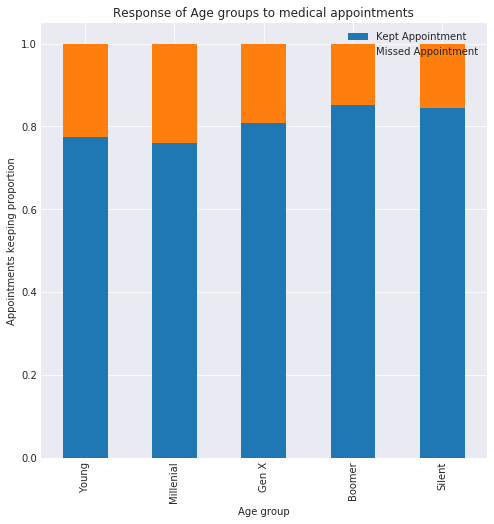

In [26]:
# for each age group, we make a plot of the proportion of those who kept their 
# medical appointments to those who missed appointment

# dataframe for our proportion plots
df_no_show_proportion_plot = pd.DataFrame({
    "Kept Appointment" : proportion_no_show_is_No,
    "Missed Appointment" : proportion_no_show_is_Yes,
})

df_no_show_proportion_plot.plot(kind="bar", stacked=True, figsize=(8,8))
plt.title('Response of Age groups to medical appointments')
plt.xlabel('Age group')
plt.ylabel('Appointments keeping proportion')
plt.legend(loc='best');

### Observations
1. From the chart above, no much variations were observed between different age groups with regards to their responses to keeping medical appointments.

2. Of all the age groups considered, __the Boomers__ recorded the highest medical appointment keeping rate, while the millenials recorded the least.

3. There was more than average compliance with medical appointments across all age groups investigated.

### Summary Statistics


In [27]:
df.describe()['age']

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

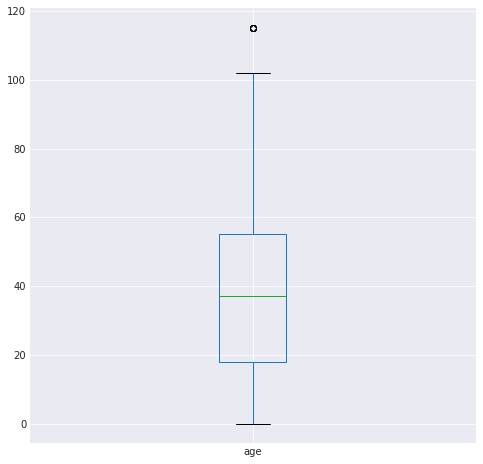

In [28]:
age_boxplot = df.boxplot('age', figsize=(8,8));

In [29]:
# Average age of all patients booked for appointment

average_age = df.mean()['age']
average_age

37.088883259294107

### How does Gender affect appointment keeping?

#### 1D Exploration

1. How many patients booked for appointment were females?
2. How many patients booked for appointment were males?
3. What is the male to female ratio in the appointment booking dataset?
4. Let's find out the Gender with the highest number of missed appointments

In [30]:
# How many patients booked for appointment were females?

gender_count_female = filter_by_query(df, 'gender', 'F').count()['gender']
gender_count_female

71840

In [31]:
# How many patients booked for appointment were male?

gender_count_male = filter_by_query(df, 'gender', 'M').count()['gender']
gender_count_male

38687

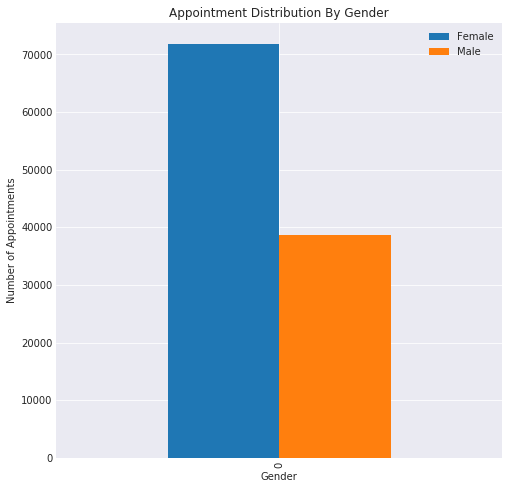

In [32]:
# What is the male and female distribution in the appointment booking dataset?
df_male_to_female = pd.DataFrame({
    'gender_count_female' : [gender_count_female],
    'gender_count_male' : [gender_count_male],
})

df_male_to_female.plot(kind='bar', figsize=(8,8))
labels = ['Female', 'Male']
plt.title('Appointment Distribution By Gender',);
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(loc='best', labels=labels,);

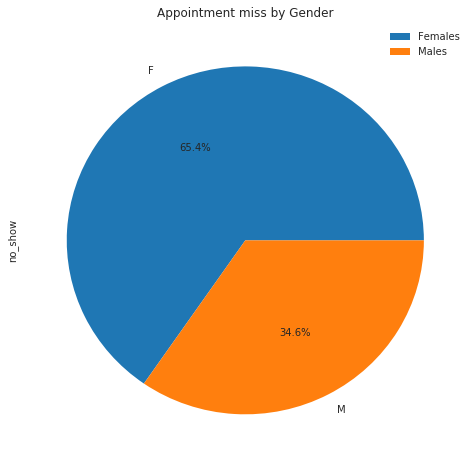

In [33]:
# Gender with the highest missed appointments:

# fetch the no_show column and filter by no_show = Yes
gender_no_show_is_yes = filter_by_query(df, 'no_show', 'Yes')

# group them by gender
gender_no_show_is_yes_group_by_gender = gender_no_show_is_yes.groupby('gender')['no_show'].count()

# plot the pie chart
gender_no_show_is_yes_group_by_gender.plot(kind='pie', figsize=(8,8), autopct = '%1.1f%%')
plt.title('Appointment miss by Gender')
labels = ['Females', 'Males']
plt.legend(labels=labels,loc='best');

**Observation**
From the pie chart above, we can see that the female gender recorded the highest number of appointment misses (65.4%).

This should be expected because they also constitute the highest number in the data set.

### Research Question 2: Influence of DateTime on appointment keeping

In [34]:
# create a dataframe with rows filtered by "no_show = No" 
# and group them by weeks
by_week_no_show_is_No = no_show_is_No.groupby(no_show_is_No.appointment_day.dt.week)['no_show'].count()


# repeate also for "no_show == Yes"
by_week_no_show_is_Yes = no_show_is_Yes.groupby(no_show_is_Yes.appointment_day.dt.week)['no_show'].count()

In [35]:
#create a dataframe of the figures in the plot
data = pd.DataFrame(
    list(zip(by_week_no_show_is_No, by_week_no_show_is_Yes)),
    columns = ['No-show = No', 'No-show = Yes'])

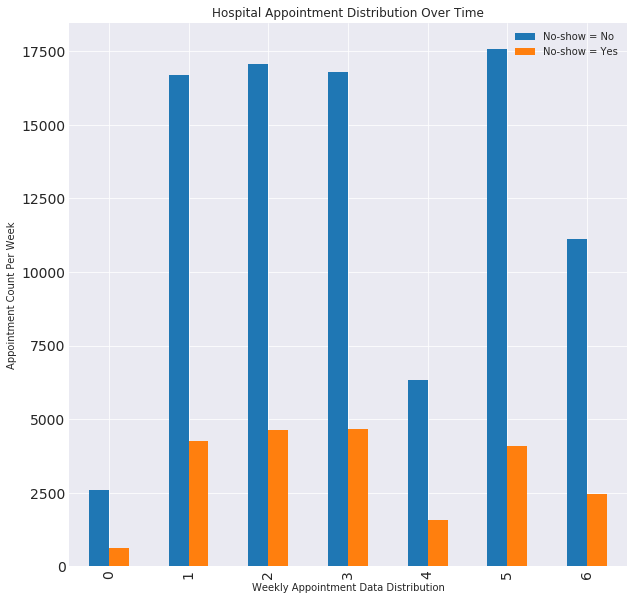

In [36]:
# plot the variations in appointment keeping over time

ax = plt.gca()

fig_plot = data.plot(kind='bar',  figsize=(10,10), ax = ax,
         title = "Hospital Appointment Distribution Over Time", fontsize=14);
fig_plot.set_xlabel("Weekly Appointment Data Distribution")
fig_plot.set_ylabel("Appointment Count Per Week");

### The plot above visualizes the weekly distribution of the hospital appointment data

i. Over a period of 7 weeks (Wk0 - Wk6), no regular correlation was found between weekly appointments booked abnd total show-up rate. The same applies to total appointments missed.

### __3. How effective is the SMS strategy?__
>**Important questions asked:** For each age group, what percentage of those who recieved SMS were able to keep to their appointment?

In [37]:
# create a dataframe for all rows with sms_received = 1
df_sms_received = filter_by_query(df, 'sms_received', 1)

# # get the number that received sms and KEPT appointment, and group by age_group
df_sms_received_and_attended = filter_by_query(df_sms_received, 'no_show', 'No').groupby('age_group')['no_show'].count()

# get the number that received sms and MISSED appointment, and group by age_group
df_sms_received_and_missed = filter_by_query(df_sms_received, 'no_show', 'Yes').groupby('age_group')['no_show'].count()

# get the total number that received sms, grouped by age_group
total_sms_received = df_sms_received_and_attended + df_sms_received_and_missed

In [38]:
# take proportions
proportion_sms_received_and_attended = df_sms_received_and_attended / total_sms_received

proportion_sms_received_and_missed = df_sms_received_and_missed / total_sms_received

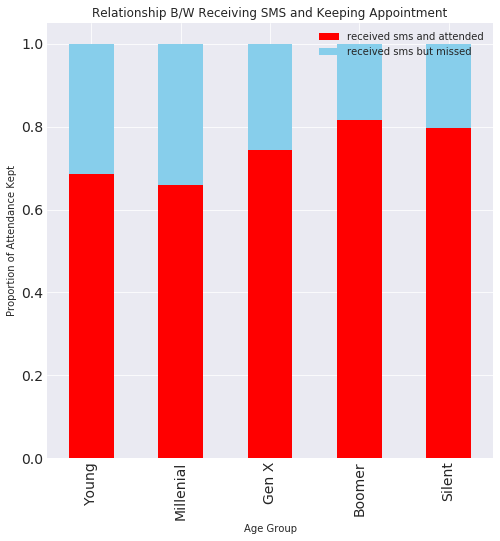

In [39]:
# Now, we visualise to see the impact of the sms strategy on appointment keeping for different age groups

df_sms_impact = pd.DataFrame(
    {
    'received sms and attended' : proportion_sms_received_and_attended,
        'received sms but missed' : proportion_sms_received_and_missed,
}, 
)

sms_impact_plot = df_sms_impact.plot(kind='bar', stacked=True, color=['red', 'skyblue'], alpha=1, figsize=(8,8), fontsize=14)
sms_impact_plot.set_xlabel('Age Group')
sms_impact_plot.set_ylabel('Proportion of Attendance Kept')
sms_impact_plot.set_title('Relationship B/W Receiving SMS and Keeping Appointment');

In [40]:
df_sms_impact

,received sms and attended,received sms but missed
age_group,,
Young,0.686573,0.313427
Millenial,0.658180,0.341820
Gen X,0.744213,0.255787
Boomer,0.816268,0.183732
Silent,0.796623,0.203377


### Observation

1. There were more persons who received SMS and kept their medical appointment than those who received SMS but still missed their appointment

2. Across all age groups, millenials have the least amount of those who received sms but still missed appointment, with a 65.8% compliance against Boomers with 81.6% compliance.

<a id='conclusions'></a>
## Conclusions

From the analysis above, we have drawn some insights into the behaviours of patients in Brazil, in relation to their hospital appointment keeping.

We looked at how the following factors contribute to overall behaviour of patients in the affected hospital neighbourhoods:

1. Demographic data such as age and gender.

2. Influence of DateTime on appointment keeping

3. How effective is the SMS strategy.

It was discovered that a lot of factors could influence an individual's response to hospital appointment keeping, some of which directly result from hospital decisions (such as appointment date and time), alongside other factors revolving around the individual.

From this tentative analysis, it was discovered that millenials (age range of 18 - 34 years), indicated the highest tendency of missing a hospital appointment, as opposed to the Boomers (50 - 69 years). 

Also, patients were found to be more likely not to miss their hospital appointments if an sms was sent to them.

The female gender constituted the highest number of appointment misses. However, this result is not enough to conclude. A better way to evaluate this would have been to look at the proportional contributions of each gender since the female gender is also the most ddminant gender evaluated.


## Limitations
This analysis is purely tentative. Readers are encouraged not to draw conclusions yet, just by simple correlation.
Keeping the above in mind, a few more limitations have been highlighted below, which are worthy of mention:

Information regarding the method of collecting this data was not mentioned. This is important as the integrity of data is directly tied to what methods were used in gathering them. 


There could be possibilities of double-counting an individual (or a set of individuals), even when this will not reflect as a duplicate data. For instance, the data evaluated covered a range of hospitals spread across different neighbourhoods. An individual could have more than one ID since nothing prevents such person from having different records across different hospitals. An important question which we could not answer from the dataset provided is wehther we are not counting a set of individuals more than once. Since this analysis focused on the tendencies of patients to keep to their hospital appointment, uniqueness of data samples is very paramount.

Even though a patient ID column was presented alongside in the original dataset, it is still unclear as to what convention such ID assignment followed. Is there a central body that assigns these IDs or are hospitals the one in charge of assigning IDs to their patients?

If the former were the case, then the possibility that each patient is unique could be established. On the other hand, if the latter were to be the case, then chances of double-counting are high.

Whatever the case may be, the dataset was not accompanied with adequate documentation to help us decipher.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0